In [1]:
from pathlib import Path
import re
import itertools
import numpy as np
import json
from tqdm.auto import tqdm
import oimdp
import torch
from torch.nn.functional import cosine_similarity
from transformers import AutoModelForTextEncoding, AutoTokenizer
from utils import get_keywords, contains_arabic
import matplotlib.pyplot as plt
import pandas as pd

/home/gpucce/Repos/arabo_panzeca/conda_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gpucce/Repos/arabo_panzeca/conda_venv/lib/python3.11/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [9]:
df = None
for id, i in enumerate(Path("out_data").glob("*.csv")):
    print(i)
    if df is None:
        df = pd.read_csv(i).set_index("index")
        df = df.map(lambda x: json.loads(x))
        new_df = None
    else:
        new_df = pd.read_csv(i).set_index("index")
        new_df = new_df.map(lambda x: json.loads(x))

    if new_df is not None:
        index = df.index.intersection(new_df.index)
        df = df.loc[index,:]
        new_df = new_df.loc[index,:]
        for col in df.columns:
            df.loc[index, col] = new_df.loc[index, col] + df.loc[index, col]

df = df.map(lambda x: np.mean(x))

out_data/0100AH_all_scores.csv
out_data/0075AH_all_scores.csv
out_data/0050AH_all_scores.csv
out_data/0150AH_all_scores.csv
out_data/0125AH_all_scores.csv
out_data/0025AH_all_scores.csv


In [11]:
df1 = pd.read_csv("/home/gpucce/Repos/arabo_panzeca/out_data/0025AH_all_scores.csv")
df1.set_index("index", inplace=True)
df1 = df1.map(lambda x: np.mean(json.loads(x)) if x.startswith("[") and x.endswith("]") else x)

In [12]:
df2 = pd.read_csv("/home/gpucce/Repos/arabo_panzeca/out_data/0050AH_all_scores.csv")
df2.set_index("index", inplace=True)
df2 = df2.map(lambda x: np.mean(json.loads(x)) if x.startswith("[") and x.endswith("]") else x)

In [23]:
df.sort_values(df.columns[0], ascending=False).round(2).to_csv("merged_scores.csv")

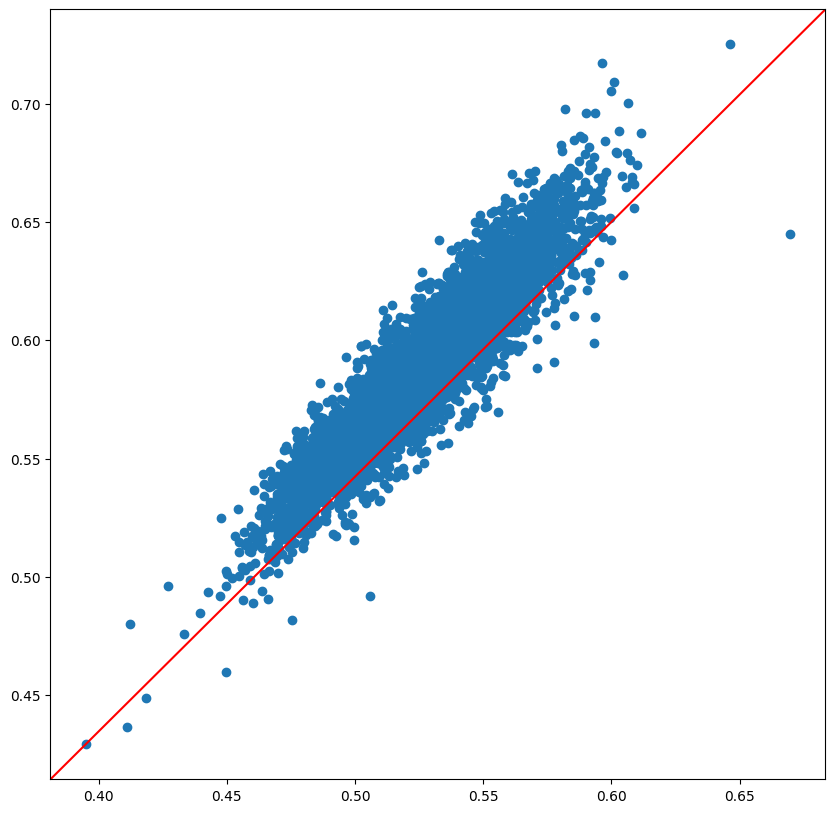

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(df.loc[df.index, df.columns[0]], df.loc[df.index, df.columns[1]])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red")

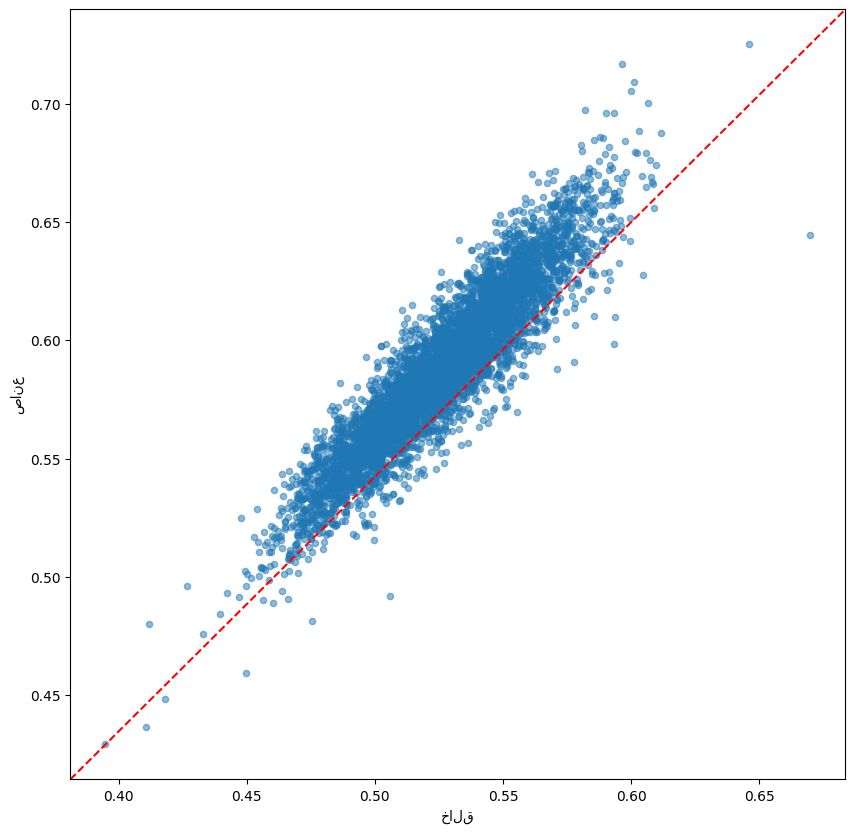

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df.plot(x=df.columns[0], y=df.columns[1], kind="scatter", ax=ax, alpha=0.5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle="--", color="red")

In [111]:
from transformers import pipeline

src_text = ["اتبع قلبك فحسب.", "وين راهي دّوش؟"]

model_name = "inceptionai/jais-13b-chat"
pipe = pipeline("text-generation", model=model_name, device="cuda:1", max_new_tokens=20, trust_remote_code=True)

print(pipe("translate the following text in English: وين راهي دّوش؟"))


A new version of the following files was downloaded from https://huggingface.co/inceptionai/jais-13b-chat:
- configuration_jais.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/inceptionai/jais-13b-chat:
- configuration_jais.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/inceptionai/jais-13b-chat:
- modeling_jais.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Loading checkpoint shards: 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.62 GiB. GPU 1 has a total capacity of 44.34 GiB of which 226.81 MiB is free. Including non-PyTorch memory, this process has 44.11 GiB memory in use. Of the allocated memory 43.70 GiB is allocated by PyTorch, and 161.28 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [11]:
translated

tensor([[61108, 15540, 15540,  ..., 15540, 15540, 25894],
        [61108, 17181, 17181,  ..., 17181, 17181, 25894]], device='cuda:0')